# Regression Model Evaluation

## Introduction

For any given set of x and y values, we can build a linear regression model using the least-squares method to find a best-fit line. Just because this model exists does not necessarily mean it is a particularly appropriate or useful way to describe the relationship between the two variables.

In this lesson, you'll learn about techniques to evaluate a regression model. First, we'll use the F-test to test whether the model overall is ***statistically significant***. Then we'll use the coefficient of determination (also known as "R-Squared") to measure the ***goodness of fit***.

## Objectives

You will be able to:

* Describe the concept of an intercept-only model
* Perform an overall F-test for significance
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to describe model performance

## The Intercept-Only Model

There is no universal, objective standard for evaluating models, because every set of x and y values is different. Therefore we measure the fit of our models against a baseline model known as the ***intercept-only model***.

An intercept-only model does not make use of any independent variables to predict the value of dependent variable $y$. Instead, it uses the **mean** of the observed responses of the dependent variable $y$ and always predicts this mean as the value of $y$ for any value of $x$. It is also known as the "mean model", "baseline model", or "restricted model".

In the image below, this model is given by the straight orange line.

<img src="images/linreg_rsq.png" width="600">

You can see that, in this plot, the intercept-only model (orange) always predicts the mean of $y$ irrespective of the value of the $x$. The gray line, however, is our fitted regression line which makes use of $x$ values to predict the values of $y$.

In order to evaluate the regression model, we ask: **is our fitted regression line better than an intercept-only model?**

We will determine this answer in terms of both statistical significance and goodness-of-fit by comparing the the ***errors*** made by our model (gray vertical arrow) to the errors made by the intercept-only model (orange vertical arrow) and determining the difference between them (red vertical arrow).

## Toy Dataset Example

Let's return to our toy dataset and fitted regression model:

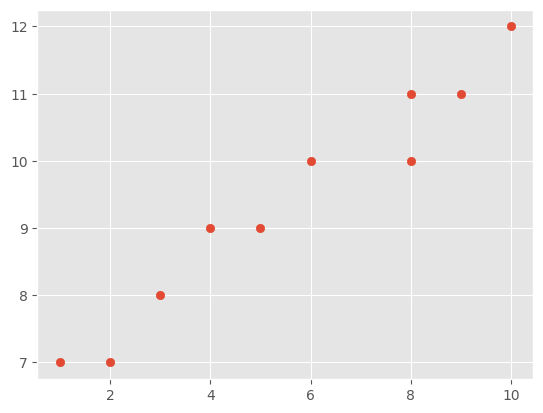

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

plt.scatter(X, Y);

Our model is: y = 0.539x + 6.3796


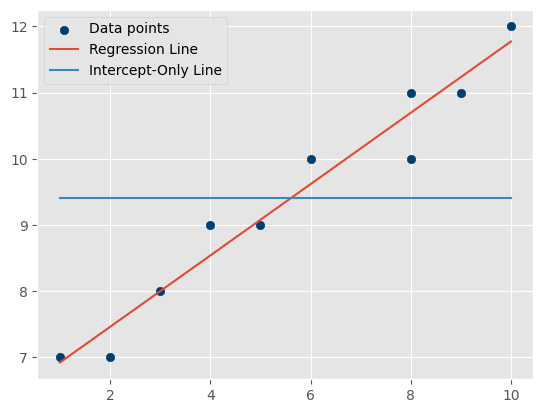

In [2]:
def calc_slope(x_vals, y_vals):
    # setting up components of formula
    rho = np.corrcoef(x_vals, y_vals)[0][1]
    s_y = y_vals.std()
    s_x = x_vals.std()
    
    # calculating slope estimate
    m = rho * s_y / s_x
    return m

def calc_intercept(m, x_vals, y_vals):
    # setting up components of formula
    y_mean = y_vals.mean()
    x_mean = x_vals.mean()
    
    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c

fig, ax = plt.subplots()
ax.scatter(X, Y, color='#003F72', label="Data points")
    
m = calc_slope(X, Y)
c = calc_intercept(m, X, Y)
print(f"Our model is: y = {round(m, 3)}x + {round(c, 4)}")

regression_line = m * X + c
ax.plot(X, regression_line, label="Regression Line")

intercept_only_line = np.array([Y.mean() for x in X])
ax.plot(X, intercept_only_line, label="Intercept-Only Line")

ax.legend();

## F-Test for Statistical Significance

So, is our overall model statistically significant? Let's frame this in terms of a null and alternative hypothesis:

* $H_0$ (null hypothesis): the intercept-only model fits the data just as well as (or better than) our model
* $H_a$ (alternative hypothesis): our model fits the data better than the intercept-only model

Then we'll follow the typical hypothesis test structure of computing a test statistic, calculating the p-value, then determining whether we can reject the null hypothesis.

### Computing the F-Statistic

For simple linear regression, the F-statistic is defined as the mean squared error of the model divided by the mean squared error of the residuals. We'll break down the formulas for this below, but **the important part to take away is that this statistic is related to how well our model performs in the context of this dataset and the intercept-only model**. This concept is more important than digging into the specific formulas, since we will use libraries to calculate these values for us in the future.

$$\large{F = \frac{MSE_{model}}{MSE_{resid}}}$$

* $MSE_{model}$: the mean squared error of the model
* $MSE_{resid}$: the mean squared error of the residuals

Breaking that down further:

$$\large{MSE_{model} = \frac{ESS}{df(model)} = \frac{\sum_i{(\hat{y_i} - \bar{y_i})^2}}{df(model)}}$$

$$\large{MSE_{resid} = \frac{RSS}{df(resid)} = \frac{\sum_i{(\hat{y_i} - y_i)^2}}{df(resid)}}$$

* $ESS$: the explained sum of squares. In other words, the sum of the squared differences between $\hat{y}$ (the predictions made by our model) and $\bar{y}$ (the mean, i.e. the prediction made by the intercept-only model)
* $df(model)$: the model degrees of freedom.
* $RSS$: the residual sum of squares. In other words, the sum of the squared differences between $\hat{y}$ (the predictions made by our model) and $y$ (the actual `Y` values)
* $df(resid)$: the residual degrees of freedom. In this case, 8, because we have 10 observations minus 2, the number of parameters (1 coefficient + 1 intercept)

#### Calculating Model MSE

To find the mean squared error of the model, we need to compute the explained sum of squares (ESS) and then divide it by the model degrees of freedom.

We will be comparing `regression_line` (representing $\hat{y}$) to `intercept_only_line` (representing $\bar{y}$). Because they are NumPy arrays, we can simply subtract one from another to find the differences:

In [3]:
regression_line - intercept_only_line

array([-2.48101852, -1.94166667, -1.40231481, -0.86296296, -0.32361111,
        0.21574074,  1.29444444,  1.29444444,  1.8337963 ,  2.37314815])

Then we can square those differences:

In [4]:
(regression_line - intercept_only_line) ** 2

array([6.15545289, 3.77006944, 1.96648684, 0.74470508, 0.10472415,
       0.04654407, 1.67558642, 1.67558642, 3.36280886, 5.63183213])

Then finally take the sum:

In [5]:
ess = ((regression_line - intercept_only_line) ** 2).sum()
ess

25.133796296296296

Model MSE is ESS divided by the degrees of freedom of the model. The degrees of freedom of the model is just the number of independent variables, which is 1 for a simple linear regression. Therefore the mean is just the same as the total, because we are only summarizing one independent variable.

In [6]:
model_df = 1

In [7]:
mse_model = ess / model_df
mse_model

25.133796296296296

#### Calculating Residual MSE

To find the mean squared error of the residuals, we need to calculate the sum of squared residuals (RSS) and then divide it by the residual degrees of freedom.

Calculating RSS is very similar to calculating ESS, except that it is comparing $\hat{y}$ (represented by the variable `regression_line`) to $y$ (represented by the variable `Y`). In other words, we're comparing our model's predicted values to the true values, rather than comparing them to the intercept-only values.

We'll follow the same process of finding the differences, then squaring the differences, then finding the sum.

In [8]:
rss = ((regression_line - Y) ** 2).sum()
rss

1.266203703703704

Residual MSE is the mean value for this total. To find the mean, we divide by the residual degrees of freedom, which is the number of observations minus the number of parameters.

In this case we have 2 parameters (1 for the coefficient and 1 for the intercept).

In [9]:
residual_df = len(Y) - 2

In [10]:
mse_residual = rss / residual_df
mse_residual

0.158275462962963

#### Calculating the F-Statistic

Putting that all together:

In [11]:
f = mse_model / mse_residual
f

158.7978062157221

### Is Our Model Statistically Significant?

We have an F-statistic of about 158.8, but what does that mean?

Let's use the survival function for the F-distribution from SciPy to find the p-value:

In [13]:
import scipy.stats

scipy.stats.f.sf(f, model_df, residual_df)

1.4755820678821615e-06

That p-value is well below the typical alpha of 0.05. We can reject the null hypothesis and say that our model is statistically significant!

## Measuring Goodness of Fit with R-Squared

Now that we know that our model is statistically significant, we can go one step further and quantify how much of the variation in the dependent variable is explained by our model. This measure is called the $R^2$ or ***coefficient of determination***.

### Calculating the Coefficient of Determination

R-squared is closely related to the F-statistic calculated above. It is defined as:

$$\large{ R^2 = \frac{ESS}{TSS} = \frac{\sum_i{(\hat{y_i} - \bar{y_i})^2}}{\sum_i(y_i - \bar{y_i})^2}}$$

We have already calculated **ESS** (the **explained** sum of squared error) above. This represents the squared difference between $\hat{y}$ and $\bar{y}$.

The only thing left to calculate is **TSS** (the **total** sum of squared error). This is the squared difference between $y$ and $\bar{y}$.

In [14]:
tss = ((Y - intercept_only_line) ** 2).sum()
tss

26.4

In [15]:
r_squared = ess / tss
r_squared

0.9520377384960719

### Interpreting R-Squared

We have a value of about 0.95 as our coefficient of determination (R-squared). What does this mean?

This means that the proportion of the variance _explained_ by our model out of the _total_ variance is about 0.95, or 95%. You can also say, ***95% of the variation in $y$ is explained by our model***.

For a least-squares regression model, R-Squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent an (almost) perfect fit

An R-Squared of 0 would mean that we are explaining 0% of the variation in $y$. This is especially likely to occur if your dataset is not actually suited to linear regression modeling, like the image below.

<img src="images/rs5.png" width="500">

An R-Squared of 1 means that you are explaining 100% of the variation. This is very unlikely to see with linear regression on real-world data, so you probably want to double-check that you have set up your variables properly.

The image below shows what it might look like if you had an R-Squared of 1:

<img src="images/rs6.png" width="500">

#### What Is a "Good" R-Squared Value?

Like many other things in data science, the answer is "it depends"!

If you are doing _inferential_ modeling, i.e. the part of the model you are most interested in is the value of the parameters, then as long as the model is statistically significant overall, you don't need to worry too much about R-Squared.

If you are doing _predictive_ modeling, i.e. you are most interested in making predictions about unknown values of $y$, then a higher R-Squared is very important.

Either way, R-Squared provides important context for how you communicate about your model to others. If your model is only explaining a tiny amount of the variation in $y$, then there are potentially-important contributing factors that aren't included in your analysis. Just be sure to communicate your findings (and their limitations) clearly!

A good template to use is:

> ***(R-Squared * 100)% of the variation in the dependent variable $y$ is explained by our model.***

## Other Notation to Be Aware Of

The formulas and variables described here also appear with slightly different variations in other resources. You don't need to memorize these, but just be aware that the same value might appear with a different name in a different context.

### Explained Sum of Squared Errors

ESS is the explained sum of squared errors, also known as $SS_{EXP}$, SSM (sum of squares for model), or sum of squares for regression. It represents the sum of the squared differences between the predicted values ($\hat{y}$) and the mean/intercept-only values ($\bar{y}$).

### Residual Sum of Squared Errors

RSS is the residual sum of squared errors, also known as $SS_{RES}$, SSE (sum of squared errors), or SSR. It represents the sum of squared differences between the true values ($y$) and the predicted values ($\hat{y}$).

### Total Sum of Squared Errors

TSS is the total sum of squared errors, also known as $SS_{TOT}$ or SST. It represents the sum of squared differences between the true values ($y$) and the mean/intercept-only values ($\bar{y}$).

TSS is also equal to the sum of RSS + ESS. In other words, the total error is the sum of the explained error plus the residual (unexplained) error.

### R-Squared

In the equation above, we said that R-Squared was equal to $\frac{ESS}{TSS}$. You also might see versions that say it is equal to $1 - \frac{RSS}{TSS}$. This is derived from the explanation above, that TSS = RSS + ESS.

**If you use the $1 - \frac{RSS}{TSS}$ version of the R-Squared formula, it is possible to get a negative R-Squared value.** Many statistical libraries use this formula for that reason. A negative R-Squared would mean that your model is worse at explaining the variance than the baseline model. If you see a negative R-Squared with ordinary least-squares linear regression, that probably means that something is wrong with the code, because a linear regression with an independent variable is built on top of an intercept-only model.

## Summary

In this lesson you looked at two ways to evaluate a linear regression model. Both of them involve comparing the regression model to an "intercept-only" baseline model that always returns the mean of $y$.

First, the F-test can be used to determine whether the model is statistically significant overall. Second, the coefficient of determination (R-Squared) can be used to describe the amount of variation in $y$ that is explained by the model.

We also discussed how to communicate the results of these assessments, as well as some alternative naming conventions and formulas that you might see.